In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [26]:
from sklearn.cluster import KMeans

<br>
<br>
<br>

### Data Collection

In [2]:
# importing csv data
data = pd.read_csv("../data/data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
# checking for duplicate values
data.duplicated().value_counts()

False    2000
dtype: int64

In [7]:
# checking for missing values
data.isna().any().any()

False

<br>

Data description

| Variable | Data Type | Range | Description |
| --- | --- | --- | --- |
| ID | numerical | Integer | Shows a unique identificator of a customer. |
| Sex | categorical | {0,1} | Biological sex (gender) of a customer. 0 = male / 1 = female |
| Marital status | categorical | {0,1} | Marital status of a customer. 0 = single / 1 = married |
| Age | numerical | Integer | The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (Min. age = 18 / Max. age = 78) |
| Education | categorical | {0,1,2,3} | Level of education of the customer. 0=no education / 1=high-school / 2=university / 3=graduate |
| Income | numerical | Real | Self-reported annual income in US dollars of the customer. |
| Occupation | categorical | {0,1,2} | Category of occupation of the customer. 0=unemployed / 1=employee/oficial / 2=management or self-employed |
| Settlement size | categorical | {0,1,2} | The size of the city that the customer lives in. 0=small / 1=mid-size / 2=big |

<br>
<br>
<br>

### Data Preprocessing

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# normalizer
scaler = MinMaxScaler()

In [12]:
# removing ID
X = data.drop(['ID'], axis=1)
X.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0


In [13]:
# normalizing data
x_scaled = scaler.fit_transform(X)
pd.DataFrame(x_scaled, columns=X.columns).head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0


In [15]:
# inspecting first instance
x_scaled[0]

array([0.        , 0.        , 0.84482759, 0.66666667, 0.32478101,
       0.5       , 1.        ])

<br>
<br>
<br>

### Clustering

In [36]:
# will hold model error
errors = []

# k from 1-10
for k in range(1, 11):

    # creating model with k
    k_means = KMeans(n_clusters=k, n_init=10)

    # training model
    k_means.fit(x_scaled)

    # adding model error to the list
    errors.append(k_means.inertia_)

In [47]:
# inspecting errors
errors[:3]

[1730.3292058262796, 1026.3608750749306, 806.7279647911286]

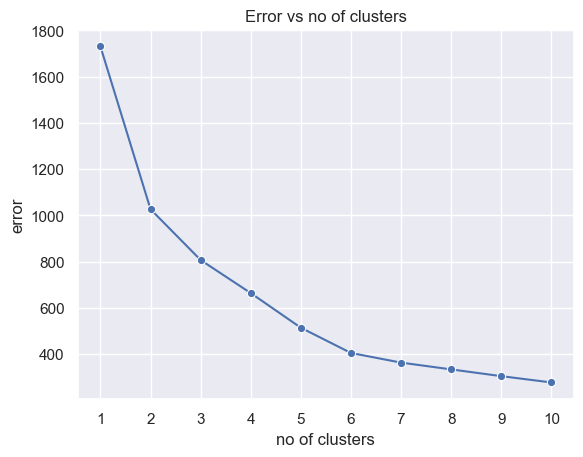

In [45]:
# error vs k line plot

sns.lineplot(x=range(1, 11), y=errors, marker='o')
plt.xticks(range(1, 11))
plt.ylabel("error")
plt.xlabel("no of clusters")
plt.title("Error vs no of clusters")
plt.show()

The elbow occurs around `2` and `6`.<br>
Taking 2 clusters will be more generalized and would not convey much information.<br>
Hence, selecting number of custers `k` as `6`.

<br>
<br>

In [48]:
# training model with 6 clusters

k = 6
k_means = KMeans(n_clusters=k, n_init=10)
k_means.fit(x_scaled)

KMeans(n_clusters=6, n_init=10)

In [50]:
# getting labels
labels = k_means.labels_
pd.Series(labels).value_counts()

0    516
1    430
2    313
5    306
4    257
3    178
dtype: int64

In [53]:
# labelling the data
X['label'] = labels
X.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,label
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,5
2,0,0,49,1,89210,0,0,2


<br>
<br>
<br>

### Cluster Analysis

Analyzing clusters created by the model

In [80]:
# utility function to get cluster information
def get_cluster_info(cluster):
    data = {}

    data['sex'] = {key:value for key, value in cluster['Sex'].value_counts().items()}
    data['married'] = {key:value for key, value in cluster['Marital status'].value_counts().items()}
    data['education'] = {key:value for key, value in cluster['Education'].value_counts().items()}
    data['occupation'] = {key:value for key, value in cluster['Occupation'].value_counts().items()}
    data['settlement'] = {key:value for key, value in cluster['Settlement size'].value_counts().items()}
    data['age'] = {'min': cluster['Age'].min().round(2), 'max': cluster['Age'].max().round(2), 'mean': cluster['Age'].mean().round(2), 'median': cluster['Age'].median().round(2)}
    data['income'] = {'min': cluster['Income'].min().round(2), 'max': cluster['Income'].max().round(2), 'mean': cluster['Income'].mean().round(2), 'median': cluster['Income'].median().round(2)}

    return data

In [ ]:
# related clusters
# 0, 2
# 1, 5
# 3, 4

In [81]:
# cluster 0
get_cluster_info(X[labels==0])

{'sex': {0: 516},
 'married': {0: 516},
 'education': {1: 306, 0: 151, 2: 59},
 'occupation': {1: 359, 2: 147, 0: 10},
 'settlement': {2: 276, 1: 239, 0: 1},
 'age': {'min': 20, 'max': 75, 'mean': 40.01, 'median': 37.0},
 'income': {'min': 82398, 'max': 287247, 'mean': 145325.6, 'median': 136317.5}}

- single men
- with big settlement

<br>

In [87]:
# cluster 1
get_cluster_info(X[labels==2])

{'sex': {0: 313},
 'married': {0: 313},
 'education': {1: 187, 0: 104, 2: 22},
 'occupation': {0: 201, 1: 108, 2: 4},
 'settlement': {0: 294, 1: 19},
 'age': {'min': 21, 'max': 74, 'mean': 37.57, 'median': 36.0},
 'income': {'min': 43684,
  'max': 219319,
  'mean': 102782.32,
  'median': 103716.0}}

- single men
- with small settlement

<br>

In [88]:
# cluster 2
get_cluster_info(X[labels==1])

{'sex': {1: 430},
 'married': {1: 430},
 'education': {1: 350, 2: 69, 3: 11},
 'occupation': {0: 246, 1: 184},
 'settlement': {0: 425, 1: 5},
 'age': {'min': 18, 'max': 71, 'mean': 32.42, 'median': 28.5},
 'income': {'min': 35832,
  'max': 207262,
  'mean': 102142.33,
  'median': 102323.5}}

- married women
- lower occupation
- small settlement

<br>

In [89]:
# cluster 3
get_cluster_info(X[labels==5])

{'sex': {1: 306},
 'married': {1: 306},
 'education': {1: 220, 2: 70, 3: 16},
 'occupation': {1: 246, 2: 58, 0: 2},
 'settlement': {1: 188, 2: 113, 0: 5},
 'age': {'min': 18, 'max': 76, 'mean': 34.28, 'median': 29.0},
 'income': {'min': 88800, 'max': 309364, 'mean': 136536.7, 'median': 126778.5}}

- married women
- higher occupation
- big settlement

<br>

In [90]:
# cluster 4
get_cluster_info(X[labels==3])

{'sex': {1: 178},
 'married': {0: 178},
 'education': {1: 128, 0: 32, 2: 16, 3: 2},
 'occupation': {0: 114, 1: 62, 2: 2},
 'settlement': {0: 165, 1: 13},
 'age': {'min': 19, 'max': 70, 'mean': 35.15, 'median': 34.5},
 'income': {'min': 36760, 'max': 143321, 'mean': 97997.24, 'median': 101511.0}}

- single women

<br>

In [91]:
# cluster 5
get_cluster_info(X[labels==4])

{'sex': {0: 257},
 'married': {1: 257},
 'education': {1: 195, 2: 55, 3: 7},
 'occupation': {1: 154, 0: 60, 2: 43},
 'settlement': {0: 99, 1: 80, 2: 78},
 'age': {'min': 18, 'max': 67, 'mean': 33.97, 'median': 31.0},
 'income': {'min': 62263,
  'max': 280570,
  'mean': 122976.72,
  'median': 115369.0}}

- married men

<br>

<br>
<br>
<br>

### Testing

Testing model on new data

In [94]:
# custom test data
test_data = [
    {
        'Sex': 1,
        'Marital status': 1,
        'Age': 30,
        'Education': 1,
        'Income': 130_000,
        'Occupation': 2,
        'Settlement size': 2,
    },
    {
        'Sex': 0,
        'Marital status': 1,
        'Age': 35,
        'Education': 2,
        'Income': 156_000,
        'Occupation': 2,
        'Settlement size': 1,
    },
]

# creating dataframe
test_df = pd.DataFrame(test_data)
test_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1,1,30,1,130000,2,2
1,0,1,35,2,156000,2,1


In [95]:
# normalizing test data
test_scaled = scaler.transform(test_df)
test_scaled

array([[1.        , 1.        , 0.20689655, 0.33333333, 0.34426685,
        1.        , 1.        ],
       [0.        , 1.        , 0.29310345, 0.66666667, 0.43931971,
        1.        , 0.5       ]])

In [96]:
# making predictions
k_means.predict(test_scaled)

array([5, 4])

In [97]:
# 5 -> married women, higher occupation, big settlement
# 4 -> married men

Predictions are as expected.

<br>
<br>
<br>

### Saving Model

In [98]:
import joblib

In [99]:
joblib.dump(k_means, "../models/k_means_6.pkl")

['../models/k_means_6.pkl']

In [100]:
joblib.dump(scaler, "../models/min_max_scaler.pkl")

['../models/min_max_scaler.pkl']

<br>
<br>
<br>

### Conclusion

| Cluster | Description |
| --- | --- |
| Cluster 0 | Single men with big settlement |
| Cluster 1 | Married women having lower occupation with small settlement |
| Cluster 2 | Single men with small settlement |
| Cluster 3 | Single women |
| Cluster 4 | Married men |
| Cluster 5 | Married women having higher occupation with big settlement |